In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,recall_score,precision_score,f1_score,classification_report

In [5]:
df = pd.read_csv('creditcard.csv')

df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [6]:
X = df.iloc[:,1:29]
y = df['Class']

In [7]:
df.shape

(284807, 31)

In [8]:
lr = LogisticRegression(class_weight={0:1,1:2}).fit(X,y)
lr

LogisticRegression(class_weight={0: 1, 1: 2})

In [9]:
predicted_y = lr.predict(X)

df_predicted = pd.DataFrame(predicted_y)
df_predicted.value_counts()

0    284370
1       437
dtype: int64

In [10]:
lr.get_params()

{'C': 1.0,
 'class_weight': {0: 1, 1: 2},
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [11]:
grid = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid={'class_weight':[{0:1,1:number}for number in range(1,10)]},
    cv=5
    
)

In [12]:
grid.fit(X,y)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 2},
                                          {0: 1, 1: 3}, {0: 1, 1: 4},
                                          {0: 1, 1: 5}, {0: 1, 1: 6},
                                          {0: 1, 1: 7}, {0: 1, 1: 8},
                                          {0: 1, 1: 9}]})

In [13]:
predicted_y= grid.predict(X)

predict = pd.DataFrame(grid.cv_results_)

grid.best_params_

{'class_weight': {0: 1, 1: 4}}

In [14]:
confusion_matrix(y,predicted_y)

array([[284225,     90],
       [   106,    386]], dtype=int64)

In [15]:
precision_score(y,predicted_y)

0.8109243697478992

In [16]:
recall_score(y,predicted_y)

0.7845528455284553

In [17]:
f1_score(y,predicted_y)

0.7975206611570248

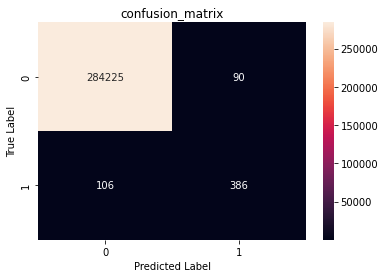

In [18]:
sns.heatmap(confusion_matrix(y,predicted_y),annot=True,fmt='d')
plt.title('confusion_matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.show()